# Genetic Algorithm for Continuous Function Optimization

https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/

Example: 

$(x_1^2, x_2^2)$ __minimization__ function.

Takes input variables $x_1$ and $x_2$ 

Has an optima (minimum) at  f(0, 0) = 0.0

In [32]:
import numpy as np
from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt
%matplotlib inline
import csv

Generate example student project selection matrix to test model 

In [62]:
with open('data/student_preference_matrices/student_preference_matrix_ideal.csv', 'r') as f:
    cost_matrix = csv.reader(f)
    
    cost_matrix = [[int(i) for i in j] for j in cost_matrix]            # convert from string
    
    cost_matrix = [[10 if i==0 else i for i in j] for j in cost_matrix] # replace zeros with 10
    
    
print(np.matrix(cost_matrix))

n_students, n_projects = np.array(cost_matrix).shape

[[ 1 10 10 10 10 10 10  5 10 10 10  4  3  2 10]
 [10  1 10 10 10 10 10  3  5 10 10 10  4 10  2]
 [10 10  1  5 10 10 10 10 10  2 10  3  4 10 10]
 [10 10 10  1  2 10 10 10  3  5 10 10  4 10 10]
 [10 10 10 10  1 10 10  2 10 10  4  3 10  5 10]
 [10 10 10 10 10  1 10  4 10 10  5 10  3  2 10]
 [10 10 10 10 10 10  1 10  4  2 10  3  5 10 10]
 [10 10 10  2 10 10 10  1  4 10  3 10 10  5 10]
 [10 10  2 10 10 10 10 10  1  3 10 10 10  4  5]
 [10 10  5 10 10 10 10  3 10  1  4  2 10 10 10]]


Define an objective / fitness function to be minimised.

In [171]:
# objective function
c = random.sample(range(n_projects), k=n_students)
print(c)

def objective(x):
    """ the function to minimize """
#     count = 0
#     for i,j in enumerate(x):
#         print(cost_matrix[i][j])
#         count += cost_matrix[i][j]
#     print(count)
        
    return sum([cost_matrix[i][j]for i,j in enumerate(x)])
    
#     print(z)
    
objective(c)

[8, 12, 1, 5, 2, 9, 10, 0, 11, 4]
[3, 6, 7, 13, 14]


94

In [172]:
# def decode(bounds, n_bits, bitstring):
#     """
#     decode bitstring to numbers 
#     i.e. bitstring value to range of numbers within the bounds specified
#     """
    
#     decoded = []
    
#     #print('bitstring', bitstring)
    
#     largest = 2**n_bits # max possible value of 16 bit number 
    
#     for i in range(len(bounds)):                     # each of the two vars 
        
#         start, end = i * n_bits, (i * n_bits)+n_bits # start index, stop index each var
        
#         substring = bitstring[start:end]             # extract sub-string using start, stop value
        
#         chars = ''.join([str(s) for s in substring]) # convert bitstring to a string of chars
        
#         #print('chars', chars)
        
#         integer = int(chars, 2)                      # convert string to integer, using base 2
        
#         value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0]) # map to desired range
        
#         decoded.append(value)                        # store
        
#     return decoded

In [173]:
def selection(pop, scores, k=3):
    """
    tournament selection
    
    """
    sample_idxs = randint(0, len(pop), k)       # select k random indexes for individuals to sample
    
    sample = [scores[i] for i in sample_idxs]   # score of each individual
    
    best_sample_idx = np.argmin(sample)         # ID of best score in sample (tournament)
    
    best_pop_idx = sample_idxs[best_sample_idx] # population ID of best score in sample
    
    return best_pop_idx      # return best individual and population ID

In [180]:
def crossover(p1_ID, p2_ID, pop, scores):
    """
    Modified fusion operator.
    Crossover two parents to one child. 
    Avoids breaking constraint that each project may be assigend to only one student.
    """
    #c1, c2 = p1.copy(), p2.copy()    # children are copies of parents by default
    
    f1, f2 = scores[p1_ID], scores[p2_ID] # fitness of each parent
    
    p1, p2 = pop[p1_ID], pop[p2_ID]       # parents
    
    c = ['*' for p in p1]                 # child
    
    for i in range(len(c)):               # for each child gene, i
        
        # if neither parent 1 and parent 2 gene i already in child chromosome
        if p1[i] not in c[:i] and p2[i] not in c[:i]: 
            
            if p1[i] == p2[i]:            # if both parent genes are the same
                c[i] = p1[i]              # set child gene as same allele
                
            # otherwise choose gene from parent 1 or 2 with probability proportional to paretn fitness
            else:                         
                if rand() <= f1/(f2+f1):
                    c[i] = p1[i]
                else:
                    c[i] = p2[i]
                    
        # if both parent 1 and parent 2 gene i already in child chromosome
        elif p1[i] in c[:i] and p2[i] in c[:i]:
            
            # choose random allele not already in child chromosome
            c[i] = random.choice(list(set(range(n_projects))-set(c[:i]))) 
            
    
        # if gene i from one parent already in child chromosome use gene from other parent
        elif p1[i] in c[:i]:
            c[i] = p2[i]
            
        elif p2[i] in c[:i]:
            c[i] = p1[i]
             
    return c
                    


In [189]:
def mutation(chromosome, r_mut):
    """
    mutation operator
    """
    for i in range(len(chromosome)):
        
        if rand() < r_mut:                     # decide whether to mutate gene
            
            # exchange gene for allele not already in chromosome
            chromosome[i] = random.choice(list(set(range(n_projects))-set(chromosome)))  
            
    return chromosome

In [208]:
# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_mut):
    
    """
    Minimises objective function.
    """
    
    # initial population of random chromosomes
    # each chromosome has length n_students which each stdeunt ssigned a project number 
    pop = [random.sample(range(n_projects), k=n_students) for _ in range(n_pop)]
    
    # initiailse list to store best solution each round
    log_best = []  
    
    # initialise variables that update when new best found to track best overall solution
    best_gen, best_score, best_sol = 0, objective(pop[0]), pop[0] # track best overall solution
    
    
    for gen in range(n_iter):                    # cycle through each generation
        
        scores = [objective(c) for c in pop]     # evaluate all chromosomes in the population
        
        best = min(scores)                       # choose the best chromosome
        
        best_ID = np.argmin(scores)              # find its position in the list 
        
        log_best.append(best)                    # store best solution this round
        
        if best < best_score:                    # if new best found, update vars and print msg
            best_gen = gen
            best_score = best
            best_sol = pop[best_ID]          
            print(f"Gen {gen}, best score = {best}, chromosome = {pop[best_ID]}")
        
        # select 2 parents
        # run tournament selection n_pop times to get 2 winners as parents of new gen
        p1_ID, p2_ID = selection(pop, scores) , selection(pop, scores)
        
        c = crossover(p1_ID, p2_ID, pop, scores)  # crossover to produce 1 child
        
        c = mutation(c, r_mut)                    # mutate child
        
        """replace worst chromosome with child if the child is:
        - better than any single
        - different from all
        chomosome in the population"""        
        
        worst_ID = np.argmax(scores)              # worst chromosome in current population
        
        if objective(c) < scores[worst_ID] and c not in pop:
            pop[worst_ID] = c
        
    return log_best, best_sol

Gen 0, best score = 58, chromosome = [0, 5, 14, 4, 3, 7, 12, 9, 8, 2]
Gen 4, best score = 55, chromosome = [0, 5, 12, 4, 3, 13, 1, 9, 8, 2]
Gen 10, best score = 48, chromosome = [0, 6, 3, 12, 1, 5, 13, 7, 8, 2]
Gen 23, best score = 42, chromosome = [0, 6, 3, 4, 7, 5, 12, 9, 8, 2]
Gen 26, best score = 41, chromosome = [0, 6, 3, 4, 1, 5, 12, 7, 8, 2]
Gen 46, best score = 33, chromosome = [0, 7, 9, 4, 3, 5, 12, 10, 8, 2]
Gen 119, best score = 32, chromosome = [0, 7, 11, 4, 1, 13, 9, 10, 8, 2]
Gen 124, best score = 30, chromosome = [0, 6, 11, 12, 4, 13, 9, 7, 8, 2]
Gen 139, best score = 29, chromosome = [0, 7, 11, 9, 4, 13, 12, 10, 8, 2]
Gen 172, best score = 25, chromosome = [0, 7, 11, 12, 4, 13, 9, 10, 8, 2]
Gen 251, best score = 24, chromosome = [0, 7, 11, 12, 4, 5, 9, 10, 8, 2]
Gen 317, best score = 23, chromosome = [0, 7, 9, 12, 4, 13, 6, 10, 8, 2]
Gen 328, best score = 22, chromosome = [0, 1, 9, 12, 7, 13, 6, 10, 8, 2]
Gen 341, best score = 20, chromosome = [0, 7, 9, 12, 4, 13, 6, 10

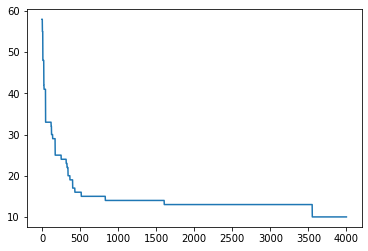

In [216]:
# bounds = [[-5.0, 5.0], # define range for input variables
#           [-5.0, 5.0]] 

# n_vars = len(bounds)   # number of variables

# n_bits = 16            # 16 bit number (bit string will have n_bits * n_vars)

n_iter = 4000           # total iterations

n_pop = 30            # define the population size

# r_cross = 0.9          # crossover rate

r_mut = 1.0 / (float(n_pop) * np.sqrt(n_students)) # mutation rate

# perform the genetic algorithm search
best_log, best_sol = genetic_algorithm(objective, n_students, n_iter, n_pop, r_mut)

plt.plot(best_log)

Display output 

In [217]:
ranks = [cost_matrix[i][j]for i,j in enumerate(best_sol)]
print(ranks)
print('\n\nsum of all assignments (should be as low as possible)=', sum(ranks))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


sum of all assignments (should be as low as possible)= 10
